In [1]:
# Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from google.colab import files

In [2]:
# Subindo o csv
n = files.upload()

Saving dadosDengueClima.csv to dadosDengueClima.csv


In [3]:
# Importando o csv para um dataframe
df = pd.read_csv("dadosDengueClima.csv", sep=';', index_col='Data', parse_dates=True)

In [4]:
# Lendo as 20 primeiras entradas
df.head(20)

,Evapotranspiracao,Insolacao,Precipitacao,TemperaturaMaxima,TemperaturaMinima,UmidadeRelativa,CasosDengue
Data,,,,,,,
2015-01-31,46.6000,NaN,46.6,35.985,23.805,50.250,15.0
2015-02-28,91.3000,162.6,84.3,34.378,23.596,64.821,13.0
2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,64.0
2015-04-30,74.1240,268.1,41.3,33.736,22.353,67.566,205.0
2015-05-31,32.5490,242.7,19.7,34.377,21.954,56.258,97.0
2015-06-30,NaN,NaN,NaN,NaN,NaN,NaN,44.0
2015-07-31,NaN,NaN,0.0,34.823,22.412,42.058,6.0
2015-08-31,4.2530,325.3,0.0,36.151,21.906,42.838,22.0
2015-09-30,1.2820,326.4,0.6,38.586,23.336,39.600,NaN


In [5]:
# Verificando algumas informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2015-01-31 to 2019-12-31
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Evapotranspiracao  46 non-null     float64
 1   Insolacao          40 non-null     float64
 2   Precipitacao       51 non-null     float64
 3   TemperaturaMaxima  50 non-null     float64
 4   TemperaturaMinima  50 non-null     float64
 5   UmidadeRelativa    50 non-null     float64
 6   CasosDengue        48 non-null     float64
dtypes: float64(7)
memory usage: 3.8 KB


In [6]:
# Verificando a quantidade de linhas e colunas nesse Dataset
print('Linhas (registros): ', df.shape[0])
print('Colunas (features): ', df.shape[1])

Linhas (registros):  60
Colunas (features):  7


In [7]:
# Verificando os tipos das colunas
df.dtypes

Evapotranspiracao    float64
Insolacao            float64
Precipitacao         float64
TemperaturaMaxima    float64
TemperaturaMinima    float64
UmidadeRelativa      float64
CasosDengue          float64
dtype: object

In [8]:
# Informação estatística do dataset
df.describe()

,Evapotranspiracao,Insolacao,Precipitacao,TemperaturaMaxima,TemperaturaMinima,UmidadeRelativa,CasosDengue
count,46.000000,40.000000,51.000000,50.000000,50.000000,50.00000,48.000000
mean,54.354052,257.937500,47.611765,35.425860,23.077980,58.28304,26.500000
std,58.209683,55.760052,70.208953,1.930601,1.468664,14.71640,40.295715
min,0.007000,134.300000,0.000000,32.314000,20.479000,39.06600,1.000000
25%,2.365000,223.300000,0.000000,34.020750,22.141000,44.39050,3.750000
50%,30.690000,268.350000,8.800000,35.081500,22.940500,55.05450,8.500000
75%,101.176000,306.875000,77.550000,36.614250,23.620250,72.59150,29.500000
max,166.854000,329.000000,332.400000,39.386000,26.493000,84.82300,205.000000


In [9]:
# Média de casos de dengue
df.CasosDengue.mean()

26.5

In [10]:
# Quantidade de valores faltantes do Dataset
df.isnull().sum()

Evapotranspiracao    14
Insolacao            20
Precipitacao          9
TemperaturaMaxima    10
TemperaturaMinima    10
UmidadeRelativa      10
CasosDengue          12
dtype: int64

In [11]:
#Visualizar algumas linhas dos valores faltantes
df[df.isnull().any(axis=1)].head(10)

,Evapotranspiracao,Insolacao,Precipitacao,TemperaturaMaxima,TemperaturaMinima,UmidadeRelativa,CasosDengue
Data,,,,,,,
2015-01-31,46.600,NaN,46.6,35.985,23.805,50.250,15.0
2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,64.0
2015-06-30,NaN,NaN,NaN,NaN,NaN,NaN,44.0
2015-07-31,NaN,NaN,0.0,34.823,22.412,42.058,6.0
2015-09-30,1.282,326.4,0.6,38.586,23.336,39.600,NaN
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2016-12-31,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2017-03-31,NaN,NaN,92.6,33.170,22.888,84.823,3.0
2017-09-30,NaN,NaN,0.0,36.147,22.905,42.437,29.0


In [12]:
# Descobrindo a Média das colunas com valores faltantes

evapotranspiracaoMedia = df.Evapotranspiracao.mean()
insolacaoMedia = df.Insolacao.mean()
precipitacaoMedia = df.Precipitacao.mean()
tempMaxMedia = df.TemperaturaMaxima.mean()
tempMinMedia = df.TemperaturaMinima.mean()
umidadeRelativaMedia = df.UmidadeRelativa.mean()
casosDengueMedia = df.CasosDengue.mean()

print('Média da Evapotranspiracao =', evapotranspiracaoMedia)
print('Média da Insolacao =', insolacaoMedia)
print('Média da Precipitacao =', precipitacaoMedia)
print('Média da Temperatura Máxima =', tempMaxMedia)
print('Média da Temperatura Mínima =', tempMinMedia)
print('Média da Umidade Relativa do ar =', umidadeRelativaMedia)
print('Média de Casos de Dengue =', casosDengueMedia)

Média da Evapotranspiracao = 54.35405217391304
Média da Insolacao = 257.9374999999999
Média da Precipitacao = 47.611764705882344
Média da Temperatura Máxima = 35.42586
Média da Temperatura Mínima = 23.077979999999997
Média da Umidade Relativa do ar = 58.28303999999999
Média de Casos de Dengue = 26.5


In [13]:
# Alterando os valores faltantes para a média de sua referida coluna

df.update(df.Evapotranspiracao.fillna(evapotranspiracaoMedia))
df.update(df.Insolacao.fillna(insolacaoMedia))
df.update(df.Precipitacao.fillna(precipitacaoMedia))
df.update(df.TemperaturaMaxima.fillna(tempMaxMedia))
df.update(df.TemperaturaMinima.fillna(tempMinMedia))
df.update(df.UmidadeRelativa.fillna(umidadeRelativaMedia))
df.update(df.CasosDengue.fillna(casosDengueMedia))

In [14]:
# Quantidade de valores faltantes do Dataset após alteração
df.isnull().sum()

Evapotranspiracao    0
Insolacao            0
Precipitacao         0
TemperaturaMaxima    0
TemperaturaMinima    0
UmidadeRelativa      0
CasosDengue          0
dtype: int64

In [15]:
# Verificando as 5 primeiras entradas sem os valores ausentes
df.head()

,Evapotranspiracao,Insolacao,Precipitacao,TemperaturaMaxima,TemperaturaMinima,UmidadeRelativa,CasosDengue
Data,,,,,,,
2015-01-31,46.600000,257.9375,46.600000,35.98500,23.80500,50.25000,15.0
2015-02-28,91.300000,162.6000,84.300000,34.37800,23.59600,64.82100,13.0
2015-03-31,54.354052,257.9375,47.611765,35.42586,23.07798,58.28304,64.0
2015-04-30,74.124000,268.1000,41.300000,33.73600,22.35300,67.56600,205.0
2015-05-31,32.549000,242.7000,19.700000,34.37700,21.95400,56.25800,97.0


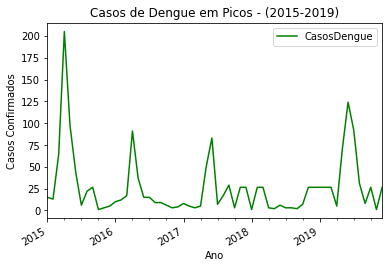

In [16]:
# Comportamento da Dengue 
fig, ax = plt.subplots();

df.CasosDengue.plot(kind='line', ax=ax, color='green')
ax.set_title('Casos de Dengue em Picos - (2015-2019)')
ax.set_xlabel('Ano')
ax.set_ylabel('Casos Confirmados')
ax.legend()

fig.autofmt_xdate()

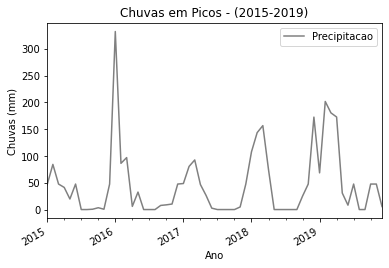

In [17]:
# Comportamento da Chuva
fig, ax = plt.subplots();

df.Precipitacao.plot(kind='line', ax=ax, color='gray')
ax.set_title('Chuvas em Picos - (2015-2019)')
ax.set_xlabel('Ano')
ax.set_ylabel('Chuvas (mm)')
ax.legend()

fig.autofmt_xdate()

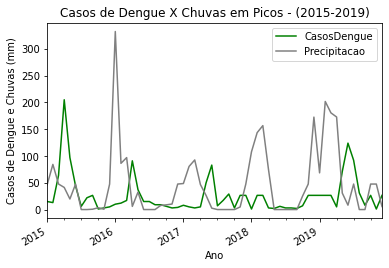

In [18]:
# Comportamento da Dengue com a Chuva
fig, ax = plt.subplots();

df.CasosDengue.plot(kind='line', ax=ax, color='green')
df.Precipitacao.plot(kind='line', ax=ax, color='gray')
ax.set_title('Casos de Dengue X Chuvas em Picos - (2015-2019)')
ax.set_xlabel('Ano')
ax.set_ylabel('Casos de Dengue e Chuvas (mm)')
ax.legend()

fig.autofmt_xdate()

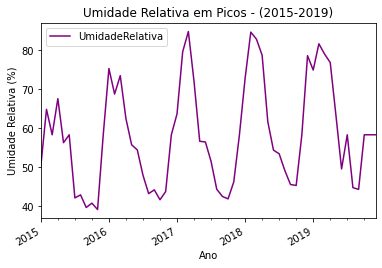

In [19]:
# Comportamento da Umidade Relativa
fig, ax = plt.subplots();

df.UmidadeRelativa.plot(kind='line', ax=ax, color='purple')
ax.set_title('Umidade Relativa em Picos - (2015-2019)')
ax.set_xlabel('Ano')
ax.set_ylabel('Umidade Relativa (%)')
ax.legend()

fig.autofmt_xdate()

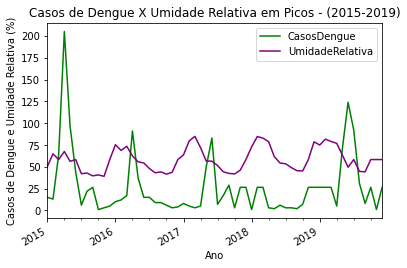

In [20]:
# Comportamento da Dengue com a Umidade Relativa
fig, ax = plt.subplots();

df.CasosDengue.plot(kind='line', ax=ax, color='green')
df.UmidadeRelativa.plot(kind='line', ax=ax, color='purple')
ax.set_title('Casos de Dengue X Umidade Relativa em Picos - (2015-2019)')
ax.set_xlabel('Ano')
ax.set_ylabel('Casos de Dengue e Umidade Relativa (%)')
ax.legend()

fig.autofmt_xdate()

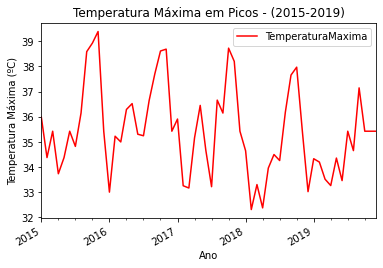

In [21]:
# Comportamento da Temperatura Máxima
fig, ax = plt.subplots();

df.TemperaturaMaxima.plot(kind='line', ax=ax, color='red')
ax.set_title('Temperatura Máxima em Picos - (2015-2019)')
ax.set_xlabel('Ano')
ax.set_ylabel('Temperatura Máxima (ºC)')
ax.legend()

fig.autofmt_xdate()

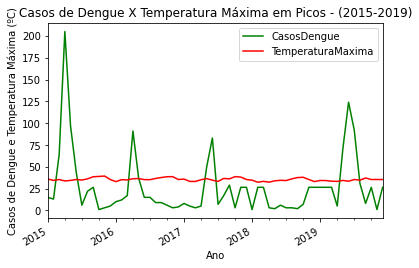

In [22]:
# Comportamento da Dengue com a Temperatura Máxima
fig, ax = plt.subplots();

df.CasosDengue.plot(kind='line', ax=ax, color='green')
df.TemperaturaMaxima.plot(kind='line', ax=ax, color='red')
ax.set_title('Casos de Dengue X Temperatura Máxima em Picos - (2015-2019)')
ax.set_xlabel('Ano')
ax.set_ylabel('Casos de Dengue e Temperatura Máxima (ºC)')
ax.legend()

fig.autofmt_xdate()

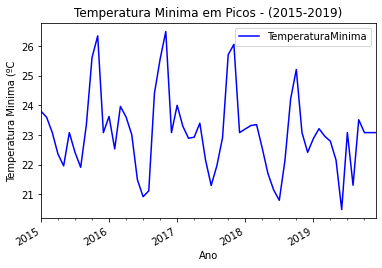

In [23]:
# Comportamento da Temperatura Minima
fig, ax = plt.subplots();

df.TemperaturaMinima.plot(kind='line', ax=ax, color='blue')
ax.set_title('Temperatura Minima em Picos - (2015-2019)')
ax.set_xlabel('Ano')
ax.set_ylabel('Temperatura Minima (ºC')
ax.legend()

fig.autofmt_xdate()

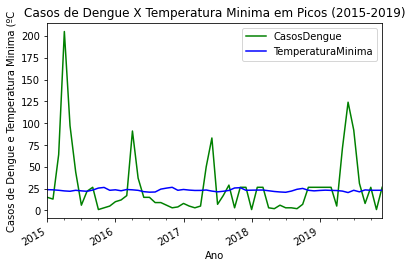

In [24]:
# Comportamento da Dengue com a Temperatura Minima
fig, ax = plt.subplots();

df.CasosDengue.plot(kind='line', ax=ax, color='green')
df.TemperaturaMinima.plot(kind='line', ax=ax, color='blue')
ax.set_title('Casos de Dengue X Temperatura Minima em Picos (2015-2019)')
ax.set_xlabel('Ano')
ax.set_ylabel('Casos de Dengue e Temperatura Minima (ºC')
ax.legend()

fig.autofmt_xdate()

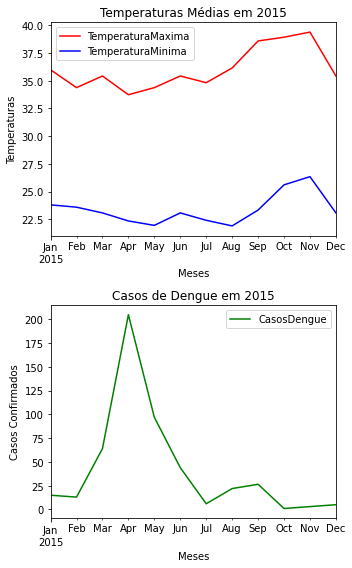

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(5,8));

# Plotar as temperaturas de 2015
df.loc['2015-01-01':'2015-12-31', 'TemperaturaMaxima'].plot(kind='line', ax=ax1, color='red')
df.loc['2015-01-01':'2015-12-31', 'TemperaturaMinima'].plot(kind='line', ax=ax1, color='blue')
ax1.set_title('Temperaturas Médias em 2015')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Temperaturas')
ax1.legend()

# Plotar os casos de dengue de 2015
df.loc['2015-01-01':'2015-12-31', 'CasosDengue'].plot(kind='line', ax=ax2, color='green')
ax2.set_title('Casos de Dengue em 2015')
ax2.set_xlabel('Meses')
ax2.set_ylabel('Casos Confirmados')
ax2.legend()

plt.tight_layout()

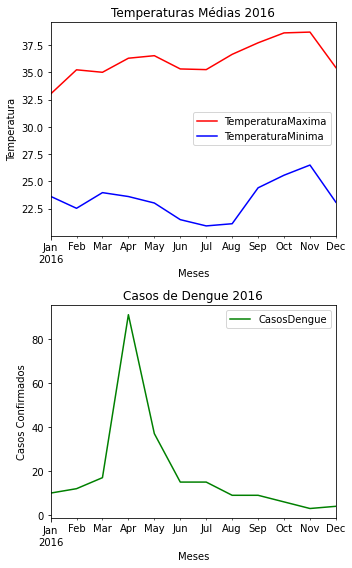

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5,8));

# Plotar as temperaturas de 2016
df.loc['2016-01-01':'2016-12-31', 'TemperaturaMaxima'].plot(kind='line', ax=ax1, color='red')
df.loc['2016-01-01':'2016-12-31', 'TemperaturaMinima'].plot(kind='line', ax=ax1, color='blue')
ax1.set_title('Temperaturas Médias 2016')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Temperatura')
ax1.legend()

# Plotar os casos de dengue de 2016
df.loc['2016-01-01':'2016-12-31', 'CasosDengue'].plot(kind='line', ax=ax2, color='green')
ax2.set_title('Casos de Dengue 2016')
ax2.set_xlabel('Meses')
ax2.set_ylabel('Casos Confirmados')
ax2.legend()

plt.tight_layout()

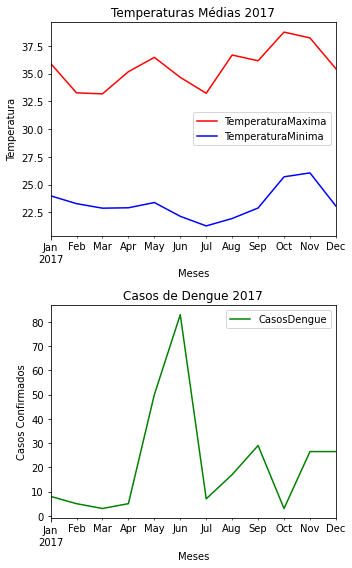

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5,8));

# Plotar as temperaturas de 2017
df.loc['2017-01-01':'2017-12-31', 'TemperaturaMaxima'].plot(kind='line', ax=ax1, color='red')
df.loc['2017-01-01':'2017-12-31', 'TemperaturaMinima'].plot(kind='line', ax=ax1, color='blue')
ax1.set_title('Temperaturas Médias 2017')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Temperatura')
ax1.legend()

# Plotar os casos de dengue de 2017
df.loc['2017-01-01':'2017-12-31', 'CasosDengue'].plot(kind='line', ax=ax2, color='green')
ax2.set_title('Casos de Dengue 2017')
ax2.set_xlabel('Meses')
ax2.set_ylabel('Casos Confirmados')
ax2.legend()

plt.tight_layout()

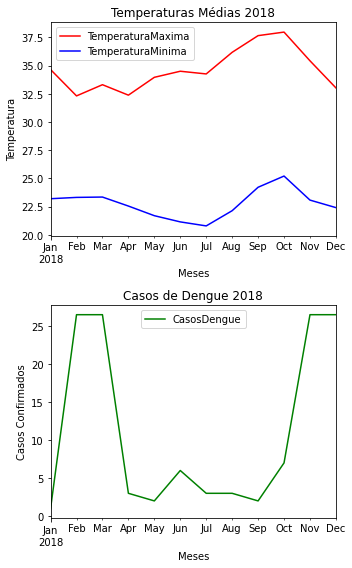

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5,8));

# Plotar as temperaturas de 2018
df.loc['2018-01-01':'2018-12-31', 'TemperaturaMaxima'].plot(kind='line', ax=ax1, color='red')
df.loc['2018-01-01':'2018-12-31', 'TemperaturaMinima'].plot(kind='line', ax=ax1, color='blue')
ax1.set_title('Temperaturas Médias 2018')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Temperatura')
ax1.legend()

# Plotar os casos de dengue de 2018
df.loc['2018-01-01':'2018-12-31', 'CasosDengue'].plot(kind='line', ax=ax2, color='green')
ax2.set_title('Casos de Dengue 2018')
ax2.set_xlabel('Meses')
ax2.set_ylabel('Casos Confirmados')
ax2.legend()

plt.tight_layout()

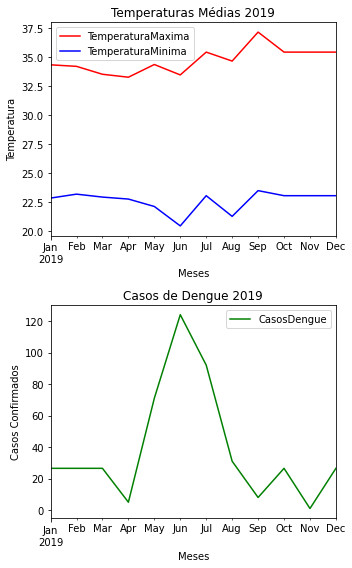

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5,8));

# Plotar as temperaturas de 2019
df.loc['2019-01-01':'2019-12-31', 'TemperaturaMaxima'].plot(kind='line', ax=ax1, color='red')
df.loc['2019-01-01':'2019-12-31', 'TemperaturaMinima'].plot(kind='line', ax=ax1, color='blue')
ax1.set_title('Temperaturas Médias 2019')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Temperatura')
ax1.legend()

# Plotar os casos de dengue de 2019
df.loc['2019-01-01':'2019-12-31', 'CasosDengue'].plot(kind='line', ax=ax2, color='green')
ax2.set_title('Casos de Dengue 2019')
ax2.set_xlabel('Meses')
ax2.set_ylabel('Casos Confirmados')
ax2.legend()

plt.tight_layout()

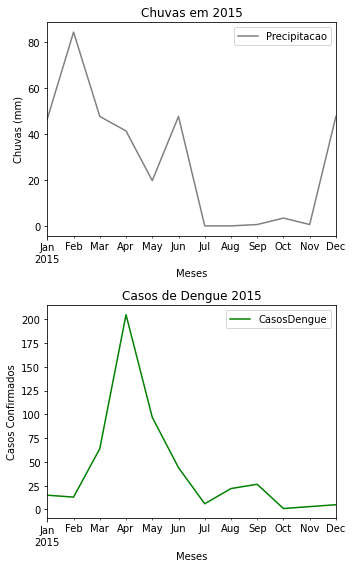

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5,8));

# Plotar as chuvas de 2015
df.loc['2015-01-01':'2015-12-31', 'Precipitacao'].plot(kind='line', ax=ax1, color='gray')
ax1.set_title('Chuvas em 2015')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Chuvas (mm)')
ax1.legend()

# Plotar os casos de dengue de 2015
df.loc['2015-01-01':'2015-12-31', 'CasosDengue'].plot(kind='line', ax=ax2, color='green')
ax2.set_title('Casos de Dengue 2015')
ax2.set_xlabel('Meses')
ax2.set_ylabel('Casos Confirmados')
ax2.legend()

plt.tight_layout()

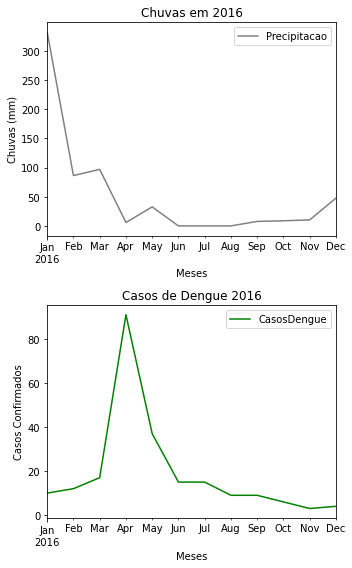

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5,8));

# Plotar as chuvas de 2016
df.loc['2016-01-01':'2016-12-31', 'Precipitacao'].plot(kind='line', ax=ax1, color='gray')
ax1.set_title('Chuvas em 2016')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Chuvas (mm)')
ax1.legend()

# Plotar os casos de dengue de 2016
df.loc['2016-01-01':'2016-12-31', 'CasosDengue'].plot(kind='line', ax=ax2, color='green')
ax2.set_title('Casos de Dengue 2016')
ax2.set_xlabel('Meses')
ax2.set_ylabel('Casos Confirmados')
ax2.legend()

plt.tight_layout()

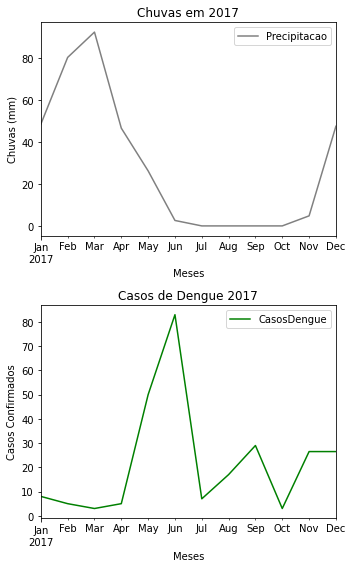

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5,8));

# Plotar as chuvas de 2017
df.loc['2017-01-01':'2017-12-31', 'Precipitacao'].plot(kind='line', ax=ax1, color='gray')
ax1.set_title('Chuvas em 2017')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Chuvas (mm)')
ax1.legend()

# Plotar os casos de dengue de 2017
df.loc['2017-01-01':'2017-12-31', 'CasosDengue'].plot(kind='line', ax=ax2, color='green')
ax2.set_title('Casos de Dengue 2017')
ax2.set_xlabel('Meses')
ax2.set_ylabel('Casos Confirmados')
ax2.legend()

plt.tight_layout()

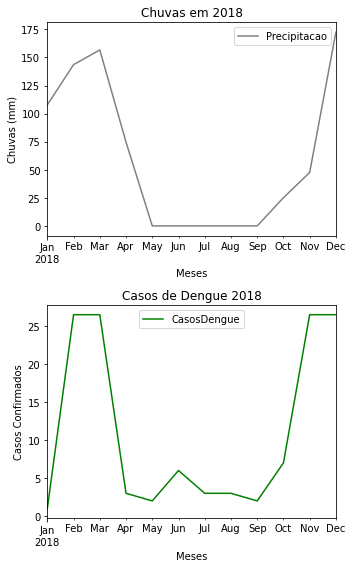

In [33]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5,8));

# Plotar as chuvas de 2018
df.loc['2018-01-01':'2018-12-31', 'Precipitacao'].plot(kind='line', ax=ax1, color='gray')
ax1.set_title('Chuvas em 2018')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Chuvas (mm)')
ax1.legend()

# Plotar os casos de dengue de 2018
df.loc['2018-01-01':'2018-12-31', 'CasosDengue'].plot(kind='line', ax=ax2, color='green')
ax2.set_title('Casos de Dengue 2018')
ax2.set_xlabel('Meses')
ax2.set_ylabel('Casos Confirmados')
ax2.legend()

plt.tight_layout()

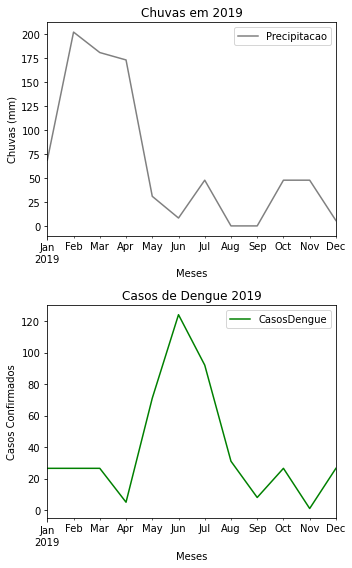

In [34]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5,8));

# Plotar as chuvas de 2019
df.loc['2019-01-01':'2019-12-31', 'Precipitacao'].plot(kind='line', ax=ax1, color='gray')
ax1.set_title('Chuvas em 2019')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Chuvas (mm)')
ax1.legend()

# Plotar os casos de dengue de 2019
df.loc['2019-01-01':'2019-12-31', 'CasosDengue'].plot(kind='line', ax=ax2, color='green')
ax2.set_title('Casos de Dengue 2019')
ax2.set_xlabel('Meses')
ax2.set_ylabel('Casos Confirmados')
ax2.legend()

plt.tight_layout()

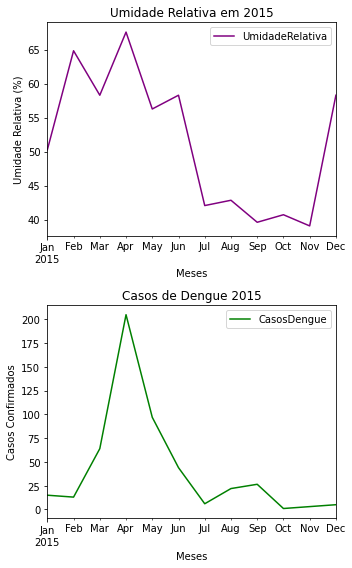

In [35]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5,8));

# Plotar a Umidade Relativa de 2015
df.loc['2015-01-01':'2015-12-31', 'UmidadeRelativa'].plot(kind='line', ax=ax1, color='purple')
ax1.set_title('Umidade Relativa em 2015')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Umidade Relativa (%)')
ax1.legend()

# Plotar os casos de dengue de 2015
df.loc['2015-01-01':'2015-12-31', 'CasosDengue'].plot(kind='line', ax=ax2, color='green')
ax2.set_title('Casos de Dengue 2015')
ax2.set_xlabel('Meses')
ax2.set_ylabel('Casos Confirmados')
ax2.legend()

plt.tight_layout()

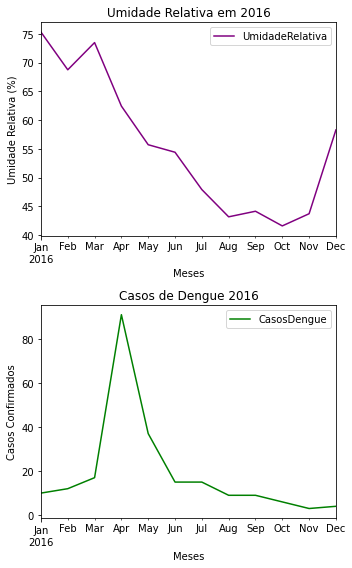

In [36]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5,8));

# Plotar a Umidade Relativa de 2016
df.loc['2016-01-01':'2016-12-31', 'UmidadeRelativa'].plot(kind='line', ax=ax1, color='purple')
ax1.set_title('Umidade Relativa em 2016')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Umidade Relativa (%)')
ax1.legend()

# Plotar os casos de dengue de 2016
df.loc['2016-01-01':'2016-12-31', 'CasosDengue'].plot(kind='line', ax=ax2, color='green')
ax2.set_title('Casos de Dengue 2016')
ax2.set_xlabel('Meses')
ax2.set_ylabel('Casos Confirmados')
ax2.legend()

plt.tight_layout()

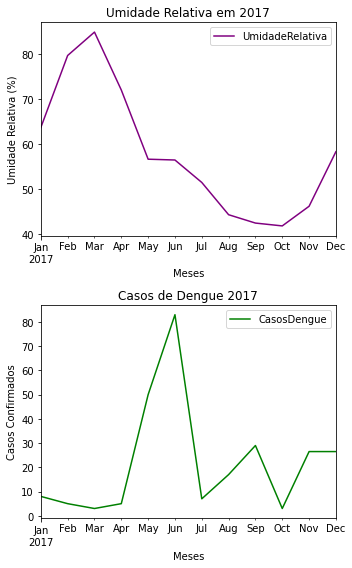

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5,8));

# Plotar a Umidade Relativa de 2017
df.loc['2017-01-01':'2017-12-31', 'UmidadeRelativa'].plot(kind='line', ax=ax1, color='purple')
ax1.set_title('Umidade Relativa em 2017')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Umidade Relativa (%)')
ax1.legend()

# Plotar os casos de dengue de 2017
df.loc['2017-01-01':'2017-12-31', 'CasosDengue'].plot(kind='line', ax=ax2, color='green')
ax2.set_title('Casos de Dengue 2017')
ax2.set_xlabel('Meses')
ax2.set_ylabel('Casos Confirmados')
ax2.legend()

plt.tight_layout()

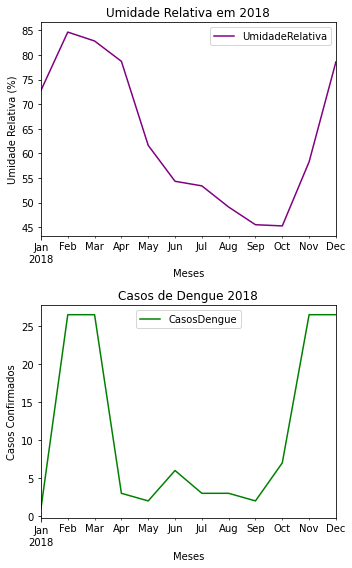

In [38]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5,8));

# Plotar a Umidade Relativa de 2018
df.loc['2018-01-01':'2018-12-31', 'UmidadeRelativa'].plot(kind='line', ax=ax1, color='purple')
ax1.set_title('Umidade Relativa em 2018')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Umidade Relativa (%)')
ax1.legend()

# Plotar os casos de dengue de 2018
df.loc['2018-01-01':'2018-12-31', 'CasosDengue'].plot(kind='line', ax=ax2, color='green')
ax2.set_title('Casos de Dengue 2018')
ax2.set_xlabel('Meses')
ax2.set_ylabel('Casos Confirmados')
ax2.legend()

plt.tight_layout()

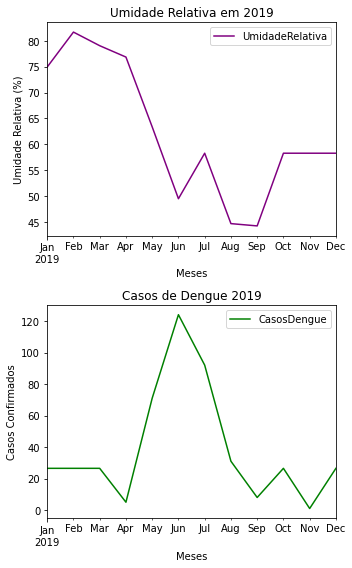

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5,8));

# Plotar a Umidade Relativa de 2019
df.loc['2019-01-01':'2019-12-31', 'UmidadeRelativa'].plot(kind='line', ax=ax1, color='purple')
ax1.set_title('Umidade Relativa em 2019')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Umidade Relativa (%)')
ax1.legend()

# Plotar os casos de dengue de 2019
df.loc['2019-01-01':'2019-12-31', 'CasosDengue'].plot(kind='line', ax=ax2, color='green')
ax2.set_title('Casos de Dengue 2019')
ax2.set_xlabel('Meses')
ax2.set_ylabel('Casos Confirmados')
ax2.legend()

plt.tight_layout()